In [2]:
import collections
import random
from random import  uniform
from math import *
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt

def H(c):
    """
    Entropy function
    """
    if c == 0. or c == 1.:
        return 0.
    
    if c < 0. or c > 1.:
        return -1000
    
    return -(c * log2(c) + (1 - c) * log2(1 - c))

def binomH(n,k):
    """
    binomial coefficient
    """
    # if k/n not in ZZ:
    #     return -100
    if(n<=0):
        return 0.
    return n * H(k/n)

def multiH(n,c):
    """
    multinomial coefficient
    """
    if sum(c)>n:
        return 0
    tot=0
    val=n
    for i in c:
        tot+=binomH(n,i)
        n-=i
    return tot


def wrap(f,g) :
    def inner(x):
        return f(g(*x))
    return inner

def r(x,y,z):
    return [(ru(x,y)) for i in range(z)]

(0.0, 0.6482)
(0.01, 0.6432)
(0.02, 0.6382)
(0.03, 0.6332)
(0.04, 0.6285)
(0.05, 0.6242)
(0.06, 0.6204)
(0.07, 0.6204)
(0.08, 0.6204)
(0.09, 0.6204)
(0.1, 0.6204)
(0.11, 0.6204)
(0.12, 0.6204)
(0.13, 0.6204)
(0.14, 0.6204)
(0.15, 0.6204)
(0.16, 0.6204)
(0.17, 0.6204)
(0.18, 0.6204)
(0.19, 0.6204)
(0.2, 0.6204)
(0.21, 0.6204)
(0.22, 0.6204)
(0.23, 0.6204)
(0.24, 0.6204)
(0.25, 0.6204)
(0.26, 0.6204)
(0.27, 0.6204)
(0.28, 0.6204)
(0.29, 0.6204)
[(0.0, 0.6482), (0.01, 0.6432), (0.02, 0.6382), (0.03, 0.6332), (0.04, 0.6285), (0.05, 0.6242), (0.06, 0.6204), (0.07, 0.6204), (0.08, 0.6204), (0.09, 0.6204), (0.1, 0.6204), (0.11, 0.6204), (0.12, 0.6204), (0.13, 0.6204), (0.14, 0.6204), (0.15, 0.6204), (0.16, 0.6204), (0.17, 0.6204), (0.18, 0.6204), (0.19, 0.6204), (0.2, 0.6204), (0.21, 0.6204), (0.22, 0.6204), (0.23, 0.6204), (0.24, 0.6204), (0.25, 0.6204), (0.26, 0.6204), (0.27, 0.6204), (0.28, 0.6204), (0.29, 0.6204)]
(0.0, 0.7272)
(0.01, 0.7222)
(0.02, 0.7172)
(0.03, 0.7122)
(0.04, 0.7076)
(

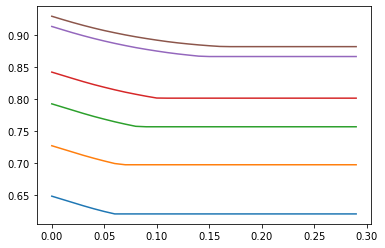

In [9]:
def reps1(wcap1,wca0,omid,zmid2,zmid1,p): 
   #length of whole vec = p 
    if wcap1 <= 0.000001 or p == 0.:
        return 0
    if p < wcap1 or p - 2*wcap1 < 2*zmid1:
        return 0.
    
    return 2*multiH(wcap1, [omid,omid,wcap1*.5-omid]) + multiH(p-2*wcap1,[zmid2,zmid2,zmid1,zmid1])


def reps2(nmid1,nmid0,nmid2,t_bar,o,z2,z1,p): 
    
    if nmid1 < 0.000001 or p == 0.:
        return 0.
    if p < nmid1 or p<nmid2 or p - 2*nmid1 - nmid2 < 2*z1:
        return 0.
    
    return 2*multiH(nmid2,[t_bar,t_bar])+2*multiH(nmid1, [o, o, nmid1*.5-o])+multiH(nmid0, [z2, z2, z1, z1])



set_vars = collections.namedtuple('LWE', ' omid zmid2 zmid1 t_bar o z2 z1 g b')
'''
t_bar  = (nmid2-t)/2
'''
def lwe(f) : return wrap(f, set_vars)


wcap1 = lambda x : x.b*x.g*w/2               #number of \pm1 in the \gamma n part in the final solution. wcap1 = wcap/2
wca0 = lambda x : x.g*1 - 2*wcap1(x)        #number of 0s in the \gamma n part in the final solution 

nmid2 = lambda x : x.omid+x.zmid2              #number of \pm1 in the \gamma n part in each summand in mid-level
nmid1 = lambda x : wcap1(x)/2+x.zmid1           #number of \pm2 in the \gamma n part in each summand in mid-level
nmid0 = lambda x : x.g*1-wcap1(x)-2*(x.zmid1+x.omid+x.zmid2)   #number of 0s in the \gamma n part in each summand in mid-level

n2 = lambda x : x.t_bar+x.o+x.z2
n1 = lambda x : nmid1(x)/2+x.z1+nmid2(x)-2*x.t_bar
n0 = lambda x : x.g*1-nmid1(x)-2*nmid2(x)+2*(x.t_bar-x.z1-x.o-x.z2)


def time(x):
    x=set_vars(*x)
    good_D = multiH(1,[w/2,w/2]) - ss(x)
    good_R = max(0,domain(x) - reps1(wcap1(x),wca0(x),x.omid,x.zmid2,x.zmid1,x.g*1))
    collisions_when_R_good = domain(x) - 2*reps2(nmid1(x),nmid0(x),nmid2(x),x.t_bar,x.o,x.z2,x.z1,x.g*1)
    one_collision=domain(x)
    return good_R+one_collision+good_D+max(collisions_when_R_good/2, collisions_when_R_good - M/2) #this is updated for the TMTO




domain = lambda x : multiH(x.g*1,[n2(x), n2(x), n1(x), n1(x)])+ multiH((1-x.g)*.25,[(1-x.b*x.g)*w*.125,(1-x.b*x.g)*w*.125])
ss = lambda x : multiH(x.g,[x.g*x.b*w/2, x.g*x.b*w/2]) + 4*multiH((1-x.g)/4,[(1-x.g*x.b)*w*.125,(1-x.g*x.b)*w*.125])
# 'ss' gives the search space which is denoted by 'D' in our paper.

constraints_lwe = [
# domain muss be equal to 1/2
    
{ 'type' : 'eq',   'fun' : lwe(lambda x : ss(x)/2-domain(x))},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : domain(x) - reps1(wcap1(x),wca0(x),x.omid,x.zmid2,x.zmid1,x.g*1))},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : domain(x) - 2*reps2(nmid1(x),nmid0(x),nmid2(x),x.t_bar,x.o,x.z2,x.z1,x.g*1))},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : -x.omid+wcap1(x)/2)},
# { 'type' : 'ineq',   'fun' : lwe(lambda x : -x.zmid2+wca0(x)/2)},
# { 'type' : 'ineq',   'fun' : lwe(lambda x : -x.zmid1+wca0(x)/2)},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : -x.zmid1-x.zmid2+wca0(x)/2)},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : -x.t_bar+nmid2(x)/2)},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : -x.o+nmid1(x)/2)},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : -x.z2-x.z1+nmid0(x)/2)},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : x.b - (1/x.g)+(1/(x.g*w))-(1/w))},
{ 'type' : 'ineq',   'fun' : lwe(lambda x : 1-x.b)}, 
{ 'type' : 'ineq',   'fun' : lwe(lambda x :  multiH(1,[w/2,w/2]) - ss(x))},

]

for weight in [.300,.375,.441,.500,.621,.668]:
    F = []   
    for i in range(0, 30):
        M = i*0.01
        w = weight
        res = 100
        ress = 5000
        for j in range(20):
            start=[uniform(0,.009), uniform(0,.009), uniform(0,.009),uniform(0,.009),uniform(0,.009),uniform(0,.009),uniform(0,.009), uniform(.01,1), uniform(.01,1)]

            bounds=[(0.,0.1)]*7+[(.01,1)]*2
            result = opt.minimize(time, start, 
                    bounds= bounds, tol=1e-08, 
                    constraints=constraints_lwe, options={'maxiter':2000})
            r = result.get('fun')
            if(r < res and r >0 and result.get('message') == 'Optimization terminated successfully'):
                   res = r
                   ress = result
        print((round(M,4),round(res,4))) 
        F.append((round(M,4),round(res,4)))

    print(F)
    xs = [x[0] for x in F]
    ys = [x[1] for x in F]
    plt.plot(xs, ys)

In [6]:
F = [(0.0, 0.93), (0.01, 0.925), (0.02, 0.9202), (0.03, 0.9157), (0.04, 0.9115), (0.05, 0.9076), (0.06, 0.9041), (0.07, 0.9008), (0.08, 0.8978), (0.09, 0.8951), (0.1, 0.8926), (0.11, 0.8903), (0.12, 0.8883), (0.13, 0.8866), (0.14, 0.8851), (0.15, 0.8838), (0.16, 0.8827), (0.17, 0.8824), (0.18, 0.8824), (0.19, 0.8824), (0.2, 0.8824), (0.21, 0.8824), (0.22, 0.8824), (0.23, 0.8824), (0.24, 0.8824), (0.25, 0.8824), (0.26, 0.8824), (0.27, 0.8824), (0.28, 0.8824), (0.29, 0.8824)]
for i in range(len(F)):
    print(F[i])

(0.0, 0.93)
(0.01, 0.925)
(0.02, 0.9202)
(0.03, 0.9157)
(0.04, 0.9115)
(0.05, 0.9076)
(0.06, 0.9041)
(0.07, 0.9008)
(0.08, 0.8978)
(0.09, 0.8951)
(0.1, 0.8926)
(0.11, 0.8903)
(0.12, 0.8883)
(0.13, 0.8866)
(0.14, 0.8851)
(0.15, 0.8838)
(0.16, 0.8827)
(0.17, 0.8824)
(0.18, 0.8824)
(0.19, 0.8824)
(0.2, 0.8824)
(0.21, 0.8824)
(0.22, 0.8824)
(0.23, 0.8824)
(0.24, 0.8824)
(0.25, 0.8824)
(0.26, 0.8824)
(0.27, 0.8824)
(0.28, 0.8824)
(0.29, 0.8824)
